# Midterm Project: Heart Disease Health Indicators

### Variables:
- HeartDiseaseorAttack: whether the patient had heart disease or a heart attack (dependent, binary)
- HighBP: high blood pressure diagnosed by a doctor, nurse, or other health professional (binary)
- HighChol: high blood cholesterol diagnosed by a doctor, nurse, or other health professional (binary)
- CholCheck: cholesterol check performed within the past five years (binary)
- BMI: Body Mass Index (numeric)
- Smoker: has smoked at least 100 cigarettes (binary)
- Stroke: ever told they had a stroke (binary)
- Diabetes: ever told they have diabetes (categorical 0-2)
- PhysActivity: did physical activity or exercise during the past 30 days other than their regular job (binary)
- Fruits: consumes Fruit 1 or more times per day (binary)
- Veggies: consumes Vegetables 1 or more times per day (binary)
- HvyAlcoholConsump: is a heavy drinker (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week, binary)
- AnyHealthcare: has any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service (binary)
- NoDocbcCost: there was a time in the past 12 months when the respondent needed to see a doctor but could not because of cost (binary)
- GenHlth: Would you say that in general your health is (categorical 1-5)
- MentHlth: days during the past 30 days when the respondent's mental health was not good (numeric)
- PhysHlth: days during the past 30 days when the respondent's physical health was not good (numeric)
- DiffWalk: respondent has serious difficulty walking or climbing stairs (binary)
- Sex: sex of respondent (binary)
- Age: age of respondent (categorical 1-13)
- Education: Highest grade or year of school completed (categorical 1-6)

## EDA

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# read in the data
data = pd.read_csv('data.csv')

### Simplify BMI, Number of Bad Mental Health Days, and Number of Bad Physical Health Days

In [2]:
# convert BMI
for i in range(len(data)):
    if data.loc[i]['BMI'] <  18.5:
        data.loc[i]['BMI'] = 1
    elif 18.5 <= data.loc[i]['BMI'] < 25:
        data.loc[i]['BMI'] = 2
    elif 25 <= data.loc[i]['BMI'] < 30:
        data.loc[i]['BMI'] = 3
    elif 30 <= data.loc[i]['BMI'] < 35:
        data.loc[i]['BMI'] = 4
    elif 35 <= data.loc[i]['BMI'] < 40:
        data.loc[i]['BMI'] = 5
    else:
        data.loc[i]['BMI'] = 6
        
# convert MentHlth
for i in range(len(data)):
    if data.loc[i]['MentHlth'] <= 5 :
        data.loc[i]['MentHlth'] = 1
    elif 5 < data.loc[i]['MentHlth'] <= 11:
        data.loc[i]['MentHlth'] = 2
    elif 11 < data.loc[i]['MentHlth'] <= 17:
        data.loc[i]['MentHlth'] = 3
    elif 17 < data.loc[i]['MentHlth'] <= 23:
        data.loc[i]['MentHlth'] = 4
    else:
        data.loc[i]['MentHlth'] = 5

# convert PhysHlth
for i in range(len(data)):
    if data.loc[i]['PhysHlth'] <= 5:
        data.loc[i]['PhysHlth'] = 1
    elif 5 < data.loc[i]['PhysHlth'] <= 11:
        data.loc[i]['PhysHlth'] = 2
    elif 11 < data.loc[i]['PhysHlth'] <= 17:
        data.loc[i]['PhysHlth'] = 3
    elif 17 < data.loc[i]['PhysHlth'] <= 23:
        data.loc[i]['PhysHlth'] = 4
    else:
        data.loc[i]['PhysHlth'] = 5

Now, BMI is 1-6 categorical variable, and the numbers of bad mental and physical health days are 1-5 categorical variables.

### Compute the entropies for the multilevel categorical variables.

In [3]:
# function to get a breakdown of whether the patient had heart disease or a heart attack by variable name/level
def breakdown_cat(indepvar: str, indepvarname: str, graph: bool, depvar = 'HeartDiseaseorAttack', data = data):
    vals = list(np.unique(data[indepvar]))
    res0 = []
    res1 = []
    ent = []
    ent0 = []
    ent1 = []
    weights = []
    odds = []
    for i in vals:
        w = len(data[data[indepvar] == i]) / len(data)
        weights.append(w)
        n = len(data[(data[indepvar] == i) & (data[depvar] == 0)]) / len(data[data[indepvar] == i])
        res0.append(n)
        ent0.append(n * np.log2(1/n))
        y = len(data[(data[indepvar] == i) & (data[depvar] == 1)]) / len(data[data[indepvar] == i])
        res1.append(y)
        ent1.append(y * np.log2(1/y))
        odd = y / (len(data[(data[indepvar] != i) & (data[depvar] == 1)]) / len(data[data[indepvar] != i]))
        odds.append(odd)
    entS = [ent0[i] + ent1[i] for i in range(len(ent0))]
    weighted_sum = np.sum([weights[i] * entS[i] for i in range(len(entS))])
    print(indepvarname)
    print('Weighted sum of conditional entropies: ' + str(weighted_sum))
    dframe = pd.DataFrame({'No Heart Disease/Attack': res0, 'Heart Disease/Attack': res1, \
                           'Odds Ratio': odds,'Proportion of Overall Population': weights, \
                           'Overall Shannon Entropy':entS}, index = vals)
    dispframe = pd.DataFrame({'No Heart Disease/Attack': res0, 'Heart Disease/Attack': res1}, index = vals)
    display(dframe)
    if graph == True:
        dispframe = pd.DataFrame({'No Heart Disease/Attack': res0, 'Heart Disease/Attack': res1}, index = vals)
        dispframe.plot.bar(xlabel = indepvarname, ylabel = 'Relative Frequency within Subpopulation')
        entframe = pd.DataFrame({'Shannon Entropy':entS},index = vals)
        entframe.plot.bar(xlabel = indepvarname, ylabel = 'Shannan Entropy', color = 'red')
    else:
        pass

In [4]:
# get the variable and column names to loop through
multilevel_cols = ['Diabetes','GenHlth','Age','Education','Income','BMI','MentHlth','PhysHlth']
multilevel_names = ['Diabetes Type','General Health','Age','Education','Income','BMI','Bad Mental Health Days',\
                    'Bad Physical Health Days']

# loop through the multilevel categorical variables
for i in range(len(multilevel_cols)):
    breakdown_cat(multilevel_cols[i], multilevel_names[i], graph = False)

Diabetes Type
Weighted sum of conditional entropies: 0.4314615128659573


,No Heart Disease/Attack,Heart Disease/Attack,Odds Ratio,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.928167,0.071833,0.336184,0.842412,0.372728
1.0,0.856618,0.143382,1.537261,0.018255,0.593027
2.0,0.777118,0.222882,3.038576,0.139333,0.765396


General Health
Weighted sum of conditional entropies: 0.40391188201780215


,No Heart Disease/Attack,Heart Disease/Attack,Odds Ratio,Proportion of Overall Population,Overall Shannon Entropy
1.0,0.977571,0.022429,0.204298,0.178567,0.154868
2.0,0.953662,0.046338,0.385889,0.351167,0.270634
3.0,0.895381,0.104619,1.165637,0.298195,0.483468
4.0,0.786886,0.213114,2.757628,0.124448,0.747392
5.0,0.660045,0.339955,4.151059,0.047623,0.924776


Age
Weighted sum of conditional entropies: 0.4092402986338386


,No Heart Disease/Attack,Heart Disease/Attack,Odds Ratio,Proportion of Overall Population,Overall Shannon Entropy
1.0,0.994912,0.005088,0.052868,0.022469,0.046083
2.0,0.992893,0.007107,0.073365,0.029951,0.060937
3.0,0.988672,0.011328,0.115608,0.043847,0.089473
4.0,0.986038,0.013962,0.141305,0.054490,0.106042
5.0,0.978276,0.021724,0.219184,0.063690,0.151016
6.0,0.964075,0.035925,0.362430,0.078126,0.223286
7.0,0.945846,0.054154,0.548011,0.103729,0.303786
8.0,0.926927,0.073073,0.752508,0.121539,0.377290
9.0,0.898989,0.101011,1.084314,0.131047,0.472191
10.0,0.869758,0.130242,1.464300,0.126908,0.558101


Education
Weighted sum of conditional entropies: 0.4433130644606781


,No Heart Disease/Attack,Heart Disease/Attack,Odds Ratio,Proportion of Overall Population,Overall Shannon Entropy
1.0,0.833333,0.166667,1.770491,0.000686,0.650022
2.0,0.807569,0.192431,2.078217,0.015937,0.706530
3.0,0.829289,0.170711,1.871515,0.037362,0.659329
4.0,0.881004,0.118996,1.383167,0.247359,0.526468
5.0,0.901044,0.098956,1.071288,0.275583,0.465677
6.0,0.934004,0.065996,0.574588,0.423072,0.350800


Income
Weighted sum of conditional entropies: 0.4356420484508994


,No Heart Disease/Attack,Heart Disease/Attack,Odds Ratio,Proportion of Overall Population,Overall Shannon Entropy
1.0,0.841708,0.158292,1.727952,0.038675,0.630207
2.0,0.813545,0.186455,2.078859,0.046448,0.693997
3.0,0.842503,0.157497,1.751414,0.063048,0.628287
4.0,0.859548,0.140452,1.557173,0.079372,0.585421
5.0,0.877874,0.122126,1.341889,0.102030,0.535443
6.0,0.900027,0.099973,1.072507,0.143764,0.468909
7.0,0.921238,0.078762,0.809032,0.170368,0.397801
8.0,0.949273,0.050727,0.429021,0.356295,0.289479


BMI
Weighted sum of conditional entropies: 0.44730425963462006


,No Heart Disease/Attack,Heart Disease/Attack,Odds Ratio,Proportion of Overall Population,Overall Shannon Entropy
1.0,0.894148,0.105852,1.125609,0.012327,0.487277
2.0,0.931562,0.068438,0.659348,0.271811,0.360067
3.0,0.907050,0.092950,0.979356,0.369556,0.446242
4.0,0.889020,0.110980,1.237205,0.210702,0.502865
5.0,0.878382,0.121618,1.325498,0.081453,0.533995
6.0,0.877411,0.122589,1.324431,0.054151,0.536756


Bad Mental Health Days
Weighted sum of conditional entropies: 0.4475160211127244


,No Heart Disease/Attack,Heart Disease/Attack,Odds Ratio,Proportion of Overall Population,Overall Shannon Entropy
1.0,0.912688,0.087312,0.644527,0.857269,0.427435
2.0,0.896991,0.103009,1.098451,0.044276,0.478463
3.0,0.872467,0.127533,1.368325,0.028591,0.550635
4.0,0.858607,0.141393,1.512762,0.014999,0.587875
5.0,0.835824,0.164176,1.821693,0.054864,0.644207


Bad Physical Health Days
Weighted sum of conditional entropies: 0.431591893922821


,No Heart Disease/Attack,Heart Disease/Attack,Odds Ratio,Proportion of Overall Population,Overall Shannon Entropy
1.0,0.929335,0.070665,0.356693,0.815449,0.368401
2.0,0.854208,0.145792,1.593205,0.049318,0.599208
3.0,0.827211,0.172789,1.888244,0.032943,0.664046
4.0,0.802408,0.197592,2.137758,0.016698,0.717086
5.0,0.761894,0.238106,2.949996,0.085592,0.791877


### Compute the entropies and odds ratios for the binary categrical variables.

In [5]:
# function to get a breakdown of whether the patient had heart disease or a heart attack by variable name/level
def breakdown_binary(indepvar: str, indepvarname: str, graph: bool, depvar = 'HeartDiseaseorAttack', data = data):
    vals = list(np.unique(data[indepvar]))
    res0 = []
    res1 = []
    ent0 = []
    ent1 = []
    weights = []
    for i in vals:
        w = len(data[data[indepvar] == i]) / len(data)
        weights.append(w)
        n = len(data[(data[indepvar] == i) & (data[depvar] == 0)]) / len(data[data[indepvar] == i])
        res0.append(n)
        ent0.append(n * np.log2(1/n))
        y = len(data[(data[indepvar] == i) & (data[depvar] == 1)]) / len(data[data[indepvar] == i])
        res1.append(y)
        ent1.append(y * np.log2(1/y))
    entS = [ent0[i] + ent1[i] for i in range(len(ent0))]
    weighted_sum = np.sum([weights[i] * entS[i] for i in range(len(entS))])
    dframe = pd.DataFrame({'No Heart Disease/Attack': res0, 'Heart Disease/Attack': res1, \
                           'Proportion of Overall Population': weights, \
                          'Overall Shannon Entropy':entS}, index = vals)
    print(indepvarname)
    print('Odds Ratio:',(res1[1]/res1[0])/(res0[1]/res0[0]))
    print('Weighted sum of conditional entropies: ' + str(weighted_sum))
    display(dframe)
    if graph == True:
        dispframe = pd.DataFrame({'No Heart Disease/Attack': res0, 'Heart Disease/Attack': res1}, index = vals)
        dispframe.plot.bar(xlabel = indepvarname, ylabel = 'Relative Frequency within Subpopulation')
        entframe = pd.DataFrame({'Shannon Entropy':entS},index = vals)
        entframe.plot.bar(xlabel = indepvarname, ylabel = 'Shannan Entropy', color = 'red')
    else:
        pass

In [6]:
# create lists of binary categorical column and variable names to loop through
binvars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke','PhysActivity', \
             'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost','DiffWalk', 'Sex']

binvarnames = ['High Blood Pressure', 'High Cholesterol', 'Had a Cholesterol Check', 'Has Smoked 100 Cigarettes', \
               'Stroke','Physically Active', 'Eats Fruit', 'Eats Veggies', 'Heavily Consumes Alcohol', \
               'Has Healthcare','Couldn\'t See a Doctor Because of Cost','Has Difficulty Walking', 'Sex']

# loop through the binary categorical variables
for i in range(len(binvars)):
    breakdown_binary(binvars[i], binvarnames[i], graph = False)

High Blood Pressure
Odds Ratio: 4.592098602559366
Weighted sum of conditional entropies: 0.4183520169099111


,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.958820,0.041180,0.570999,0.247678
1.0,0.835264,0.164736,0.429001,0.645519


High Cholesterol
Odds Ratio: 3.5890725604845954
Weighted sum of conditional entropies: 0.42679414153717465


,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.951126,0.048874,0.575879,0.281596
1.0,0.844290,0.155710,0.424121,0.623947


Had a Cholesterol Check
Odds Ratio: 3.6350141858355496
Weighted sum of conditional entropies: 0.44841620920667574


,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.971383,0.028617,0.03733,0.187406
1.0,0.903272,0.096728,0.96267,0.458538


Has Smoked 100 Cigarettes
Odds Ratio: 2.2039431659792883
Weighted sum of conditional entropies: 0.4408895526524299


,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.935635,0.064365,0.556831,0.344534
1.0,0.868345,0.131655,0.443169,0.561958


Stroke
Odds Ratio: 6.936202083608327
Weighted sum of conditional entropies: 0.4315016311689527


,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.918007,0.081993,0.959429,0.409161
1.0,0.617470,0.382530,0.040571,0.959809


Physically Active
Odds Ratio: 0.5359803822592469
Weighted sum of conditional entropies: 0.445205307902124


,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.860865,0.139135,0.243456,0.581970
1.0,0.920279,0.079721,0.756544,0.401194


Eats Fruit
Odds Ratio: 0.8704709000609268
Weighted sum of conditional entropies: 0.45000873012353737


,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.898202,0.101798,0.365744,0.474669
1.0,0.910204,0.089796,0.634256,0.435789


Eats Veggies
Odds Ratio: 0.7278449279033656
Weighted sum of conditional entropies: 0.4492382687820262


,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.882084,0.117916,0.18858,0.523342
1.0,0.911330,0.088670,0.81142,0.432016


Heavily Consumes Alcohol
Odds Ratio: 0.5938410943412054
Weighted sum of conditional entropies: 0.44960436575159357


,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.903748,0.096252,0.943803,0.457000
1.0,0.940516,0.059484,0.056197,0.325392


Has Healthcare
Odds Ratio: 1.4001593784760846
Weighted sum of conditional entropies: 0.4500141988710656


,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.929935,0.070065,0.048947,0.366167
1.0,0.904573,0.095427,0.951053,0.454330


Couldn't See a Doctor Because of Cost
Odds Ratio: 1.4071459773084476
Weighted sum of conditional entropies: 0.4496468455296574


,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.908560,0.091440,0.915823,0.441260
1.0,0.875948,0.124052,0.084177,0.540896


Has Difficulty Walking
Odds Ratio: 4.266085291276664
Weighted sum of conditional entropies: 0.42414012708185544


,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.933755,0.066245,0.831776,0.351751
1.0,0.767663,0.232337,0.168224,0.782064


Sex
Odds Ratio: 1.8031605649849693
Weighted sum of conditional entropies: 0.4449859668267673


,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0.0,0.928121,0.071879,0.559658,0.372898
1.0,0.877464,0.122536,0.440342,0.536607


### Examine smaller subgroups variables using entropy to get a better idea of which subgroups are more/less at risk.

In [7]:
# function to get a breakdown of whether the patient had heart disease or a heart attack by variable name/level,
# this time subset twice over (age and sex, diabetes and smoker, etc.)
def breakdown_cat_multi(indepvar1: str, indepvarname1: str, indepvar2: str, indepvarname2: str, \
                  sig: bool, depvar = 'HeartDiseaseorAttack', data = data):
    groups = list(np.unique(data[indepvar1]))
    res0 = []
    res1 = []
    ent = []
    ent0 = []
    ent1 = []
    weights = []
    master_vals = []
    subvals = []
    for group in groups:
        vals = list(np.unique(data[indepvar2]))
        for i in vals:
            master_vals.append(group)
            subvals.append(i)
            w = len(data[(data[indepvar1] == group) & (data[indepvar2] == i)]) / len(data)
            weights.append(w)
            if len(data[(data[indepvar1] == group) & (data[indepvar2] == i)]) != 0 :
                n = len(data[(data[indepvar1] == group) & (data[indepvar2] == i) & (data[depvar] == 0)]) \
                / len(data[(data[indepvar1] == group) & (data[indepvar2] == i)])
                res0.append(n)
                if n != 0:
                    ent0.append(n * np.log2(1/n))
                else:
                    ent0.append(0)
            else:
                n = 0
                res0.append(n)
                ent0.append(0)
            if len(data[(data[indepvar1] == group) & (data[indepvar2] == i)]) != 0:
                y = len(data[(data[indepvar1] == group) & (data[indepvar2] == i) & (data[depvar] == 1)]) \
                / len(data[(data[indepvar1] == group) & (data[indepvar2] == i)])
                res1.append(y)
                if y != 0:
                    ent1.append(y * np.log2(1/y))
                else:
                    ent1.append(0)
            else:
                y = 0
                res1.append(y)
                ent1.append(0)
    entS = [ent0[i] + ent1[i] for i in range(len(ent0))]
    v1 = str(indepvarname1) + ' Value'
    v2 = str(indepvarname2) + ' Value'
    dframe = pd.DataFrame({v1 : master_vals, v2: subvals,'No Heart Disease/Attack': res0, \
                           'Heart Disease/Attack': res1, 'Proportion of Overall Population': weights, \
                           'Overall Shannon Entropy': entS})
    if sig == True:
        if len(dframe[dframe['Overall Shannon Entropy'] > 0.70]) != 0:
            print(indepvarname1 + ' across all levels of ' + str(indepvarname2))
            weighted_sum = np.sum([weights[i] * entS[i] for i in range(len(entS))])
            print('Weighted sum of conditional entropies: ' + str(weighted_sum))
            display(dframe[dframe['Overall Shannon Entropy'] > 0.75])
        else:
            pass
    else:
        print(indepvarname1 + ' across all levels of ' + str(indepvarname2))
        weighted_sum = np.sum([weights[i] * entS[i] for i in range(len(entS))])
        print('Weighted sum of conditional entropies: ' + str(weighted_sum))
        display(dframe)

In [8]:
# create lists of categorical column and variable names to loop through in pairs
indepvars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', \
             'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', \
             'DiffWalk', 'Sex', 'Age', 'Education','Income','MentHlth','PhysHlth', 'BMI']

indepvarnames = ['High Blood Pressure', 'High Cholesterol', 'Had a Cholesterol Check','Has Smoked 100 Cigarettes', \
                 'Stroke', 'Diabetes Type','Physically Active', 'Eats Fruit', 'Eats Veggies', \
                 'Heavily Consumes Alcohol', 'Has Healthcare','Couldn\'t See a Doctor Because of Cost', \
                 'General Health Level', 'Has Difficulty Walking', 'Sex','Age Level', 'Education Level', \
                 'Income Level','Bad Mental Health Days', 'Bad Physical Health Days', 'BMI']

### Rather than looping over all of the variables at once, we will loop through one per cell for better readability.

#### High Blood Pressure

In [9]:
for i in range(1, len(indepvars), 1):
    breakdown_cat_multi('HighBP','High Blood Pressure',indepvars[i],indepvarnames[i], sig = True)

High Blood Pressure across all levels of High Cholesterol
Weighted sum of conditional entropies: 0.4069976036557521


,High Blood Pressure Value,High Cholesterol Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


High Blood Pressure across all levels of Has Smoked 100 Cigarettes
Weighted sum of conditional entropies: 0.4114305435199791


,High Blood Pressure Value,Has Smoked 100 Cigarettes Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


High Blood Pressure across all levels of Stroke
Weighted sum of conditional entropies: 0.4045988537958685


,High Blood Pressure Value,Stroke Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
1,0.0,1.0,0.723285,0.276715,0.010513,0.850937
3,1.0,1.0,0.580459,0.419541,0.030058,0.981240


High Blood Pressure across all levels of Diabetes Type
Weighted sum of conditional entropies: 0.4088849856015569


,High Blood Pressure Value,Diabetes Type Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
5,1.0,2.0,0.74891,0.25109,0.104872,0.813001


High Blood Pressure across all levels of Physically Active
Weighted sum of conditional entropies: 0.41561564747666224


,High Blood Pressure Value,Physically Active Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


High Blood Pressure across all levels of Couldn't See a Doctor Because of Cost
Weighted sum of conditional entropies: 0.4178332018013353


,High Blood Pressure Value,Couldn't See a Doctor Because of Cost Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


High Blood Pressure across all levels of General Health Level
Weighted sum of conditional entropies: 0.3878808547198901


,High Blood Pressure Value,General Health Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
8,1.0,4.0,0.737916,0.262084,0.08098,0.829876
9,1.0,5.0,0.598161,0.401839,0.03301,0.972016


High Blood Pressure across all levels of Has Difficulty Walking
Weighted sum of conditional entropies: 0.401950097175932


,High Blood Pressure Value,Has Difficulty Walking Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
3,1.0,1.0,0.721069,0.278931,0.113568,0.85399


High Blood Pressure across all levels of Sex
Weighted sum of conditional entropies: 0.41386057456956593


,High Blood Pressure Value,Sex Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


High Blood Pressure across all levels of Age Level
Weighted sum of conditional entropies: 0.39324758567810214


,High Blood Pressure Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
24,1.0,12.0,0.769939,0.230061,0.041123,0.778118
25,1.0,13.0,0.723246,0.276754,0.044497,0.850990


High Blood Pressure across all levels of Education Level
Weighted sum of conditional entropies: 0.41454104962037325


,High Blood Pressure Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
6,1.0,1.0,0.727273,0.272727,0.000347,0.845351
7,1.0,2.0,0.744663,0.255337,0.009417,0.819628
8,1.0,3.0,0.766491,0.233509,0.021693,0.784078


High Blood Pressure across all levels of Income Level
Weighted sum of conditional entropies: 0.40969070372837674


,High Blood Pressure Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
8,1.0,1.0,0.768202,0.231798,0.021224,0.781132
9,1.0,2.0,0.746630,0.253370,0.027491,0.816575
10,1.0,3.0,0.776006,0.223994,0.034863,0.767393


High Blood Pressure across all levels of Bad Mental Health Days
Weighted sum of conditional entropies: 0.4164716511233277


,High Blood Pressure Value,Bad Mental Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
8,1.0,4.0,0.779076,0.220924,0.007423,0.761851
9,1.0,5.0,0.761657,0.238343,0.029506,0.792274


High Blood Pressure across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.4057875962024119


,High Blood Pressure Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
6,1.0,2.0,0.782569,0.217431,0.025871,0.755449
7,1.0,3.0,0.758563,0.241437,0.018874,0.797422
8,1.0,4.0,0.747100,0.252900,0.010194,0.815843
9,1.0,5.0,0.699781,0.300219,0.054005,0.881558


High Blood Pressure across all levels of BMI
Weighted sum of conditional entropies: 0.41782543820288337


,High Blood Pressure Value,BMI Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


#### High Cholesterol

In [10]:
for i in range(2, len(indepvars), 1):
    breakdown_cat_multi('HighChol','High Cholesterol',indepvars[i],indepvarnames[i], sig = True)

High Cholesterol across all levels of Has Smoked 100 Cigarettes
Weighted sum of conditional entropies: 0.41960559035780376


,High Cholesterol Value,Has Smoked 100 Cigarettes Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


High Cholesterol across all levels of Stroke
Weighted sum of conditional entropies: 0.4108941282160625


,High Cholesterol Value,Stroke Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
1,0.0,1.0,0.696645,0.303355,0.014333,0.885354
3,1.0,1.0,0.574219,0.425781,0.026238,0.984047


High Cholesterol across all levels of Diabetes Type
Weighted sum of conditional entropies: 0.41420151386376736


,High Cholesterol Value,Diabetes Type Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
5,1.0,2.0,0.745504,0.254496,0.09337,0.818327


High Cholesterol across all levels of Physically Active
Weighted sum of conditional entropies: 0.42295721779542494


,High Cholesterol Value,Physically Active Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


High Cholesterol across all levels of Couldn't See a Doctor Because of Cost
Weighted sum of conditional entropies: 0.42623505338260054


,High Cholesterol Value,Couldn't See a Doctor Because of Cost Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


High Cholesterol across all levels of General Health Level
Weighted sum of conditional entropies: 0.39015358058330274


,High Cholesterol Value,General Health Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,0.0,5.0,0.757955,0.242045,0.017964,0.798425
8,1.0,4.0,0.730676,0.269324,0.071192,0.840494
9,1.0,5.0,0.600744,0.399256,0.029659,0.970514


High Cholesterol across all levels of Has Difficulty Walking
Weighted sum of conditional entropies: 0.40602899350314176


,High Cholesterol Value,Has Difficulty Walking Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
3,1.0,1.0,0.712265,0.287735,0.098092,0.865778


High Cholesterol across all levels of Sex
Weighted sum of conditional entropies: 0.42200602016480593


,High Cholesterol Value,Sex Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


High Cholesterol across all levels of Age Level
Weighted sum of conditional entropies: 0.3963280085386408


,High Cholesterol Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
24,1.0,12.0,0.758221,0.241779,0.035005,0.797987
25,1.0,13.0,0.703965,0.296035,0.035793,0.876390


High Cholesterol across all levels of Education Level
Weighted sum of conditional entropies: 0.4211368537014072


,High Cholesterol Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
6,1.0,1.0,0.758621,0.241379,0.000343,0.797327
7,1.0,2.0,0.746420,0.253580,0.008534,0.816903
8,1.0,3.0,0.756597,0.243403,0.018673,0.800654


High Cholesterol across all levels of Income Level
Weighted sum of conditional entropies: 0.4145171580163397


,High Cholesterol Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
8,1.0,1.0,0.771227,0.228773,0.018988,0.775866
9,1.0,2.0,0.745610,0.254390,0.024468,0.818163
10,1.0,3.0,0.775007,0.224993,0.030030,0.769181


High Cholesterol across all levels of Bad Mental Health Days
Weighted sum of conditional entropies: 0.4248302438874413


,High Cholesterol Value,Bad Mental Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
9,1.0,5.0,0.771702,0.228298,0.029198,0.775032


High Cholesterol across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.41192182866614074


,High Cholesterol Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
7,1.0,3.0,0.767431,0.232569,0.017696,0.782462
8,1.0,4.0,0.742281,0.257719,0.009575,0.823285
9,1.0,5.0,0.701609,0.298391,0.048999,0.879315


High Cholesterol across all levels of BMI
Weighted sum of conditional entropies: 0.4253307390825758


,High Cholesterol Value,BMI Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


#### Had a Cholesterol Check

In [11]:
for i in range(3, len(indepvars), 1):
    breakdown_cat_multi('CholCheck','Had a Cholesterol Check',indepvars[i],indepvarnames[i], sig = True)

Had a Cholesterol Check across all levels of Stroke
Weighted sum of conditional entropies: 0.4298173025708973


,Had a Cholesterol Check Value,Stroke Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
1,0.0,1.0,0.670968,0.329032,0.000611,0.913935
3,1.0,1.0,0.616652,0.383348,0.039960,0.960372


Had a Cholesterol Check across all levels of Diabetes Type
Weighted sum of conditional entropies: 0.43016793872938963


,Had a Cholesterol Check Value,Diabetes Type Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
2,0.0,2.0,0.784232,0.215768,0.000950,0.752364
5,1.0,2.0,0.777069,0.222931,0.138383,0.765484


Had a Cholesterol Check across all levels of General Health Level
Weighted sum of conditional entropies: 0.4026423921744542


,Had a Cholesterol Check Value,General Health Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
8,1.0,4.0,0.784082,0.215918,0.121444,0.752643
9,1.0,5.0,0.656981,0.343019,0.046669,0.927678


Had a Cholesterol Check across all levels of Has Difficulty Walking
Weighted sum of conditional entropies: 0.42272358956879563


,Had a Cholesterol Check Value,Has Difficulty Walking Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
3,1.0,1.0,0.765307,0.234693,0.164822,0.786104


Had a Cholesterol Check across all levels of Age Level
Weighted sum of conditional entropies: 0.40845637684879044


,Had a Cholesterol Check Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
25,1.0,13.0,0.758607,0.241393,0.067443,0.79735


Had a Cholesterol Check across all levels of Education Level
Weighted sum of conditional entropies: 0.44140649157674705


,Had a Cholesterol Check Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


Had a Cholesterol Check across all levels of Income Level
Weighted sum of conditional entropies: 0.43351125678734065


,Had a Cholesterol Check Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


Had a Cholesterol Check across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.43000469798245666


,Had a Cholesterol Check Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
9,1.0,5.0,0.759054,0.240946,0.0837,0.796609


#### Has Smoked 100 Cigarettes

In [12]:
for i in range(4, len(indepvars), 1):
    breakdown_cat_multi('Smoker','Has Smoked 100 Cigarettes',indepvars[i],indepvarnames[i], sig = True)

Has Smoked 100 Cigarettes across all levels of Stroke
Weighted sum of conditional entropies: 0.423457478097839


,Has Smoked 100 Cigarettes Value,Stroke Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
1,0.0,1.0,0.671259,0.328741,0.016596,0.913635
3,1.0,1.0,0.580237,0.419763,0.023975,0.981343


Has Smoked 100 Cigarettes across all levels of Diabetes Type
Weighted sum of conditional entropies: 0.42337111000767785


,Has Smoked 100 Cigarettes Value,Diabetes Type Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
5,1.0,2.0,0.73096,0.26904,0.072205,0.840083


Has Smoked 100 Cigarettes across all levels of General Health Level
Weighted sum of conditional entropies: 0.39964116038320174


,Has Smoked 100 Cigarettes Value,General Health Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,0.0,5.0,0.708186,0.291814,0.016710,0.871053
8,1.0,4.0,0.754809,0.245191,0.068858,0.803567
9,1.0,5.0,0.634022,0.365978,0.030913,0.947534


Has Smoked 100 Cigarettes across all levels of Has Difficulty Walking
Weighted sum of conditional entropies: 0.4177144902962772


,Has Smoked 100 Cigarettes Value,Has Difficulty Walking Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
3,1.0,1.0,0.737816,0.262184,0.097308,0.830023


Has Smoked 100 Cigarettes across all levels of Age Level
Weighted sum of conditional entropies: 0.4025619172377857


,Has Smoked 100 Cigarettes Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
24,1.0,12.0,0.765870,0.234130,0.032478,0.785142
25,1.0,13.0,0.725201,0.274799,0.030956,0.848268


Has Smoked 100 Cigarettes across all levels of Education Level
Weighted sum of conditional entropies: 0.43596305639549876


,Has Smoked 100 Cigarettes Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
6,1.0,1.0,0.772727,0.227273,0.000260,0.773227
7,1.0,2.0,0.755102,0.244898,0.007726,0.803091


Has Smoked 100 Cigarettes across all levels of Income Level
Weighted sum of conditional entropies: 0.428653132365354


,Has Smoked 100 Cigarettes Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
9,1.0,2.0,0.781067,0.218933,0.026234,0.758215


Has Smoked 100 Cigarettes across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.4247291610496957


,Has Smoked 100 Cigarettes Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
8,1.0,4.0,0.764283,0.235717,0.009315,0.787845
9,1.0,5.0,0.731269,0.268731,0.051561,0.839638


#### Stroke

In [13]:
for i in range(5, len(indepvars), 1):
    breakdown_cat_multi('Stroke','Stroke',indepvars[i],indepvarnames[i], sig = True)

Stroke across all levels of Diabetes Type
Weighted sum of conditional entropies: 0.4160650742227684


,Stroke Value,Diabetes Type Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
3,1.0,0.0,0.674508,0.325492,0.026644,0.910254
4,1.0,1.0,0.618868,0.381132,0.001045,0.958838
5,1.0,2.0,0.499388,0.500612,0.012882,0.999999


Stroke across all levels of Physically Active
Weighted sum of conditional entropies: 0.4276703661845381


,Stroke Value,Physically Active Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
2,1.0,0.0,0.573540,0.426460,0.015732,0.984338
3,1.0,1.0,0.645294,0.354706,0.024838,0.938200


Stroke across all levels of Eats Fruit
Weighted sum of conditional entropies: 0.4312752699436893


,Stroke Value,Eats Fruit Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
2,1.0,0.0,0.609738,0.390262,0.016111,0.964968
3,1.0,1.0,0.622562,0.377438,0.024460,0.956212


Stroke across all levels of Eats Veggies
Weighted sum of conditional entropies: 0.43078128974870356


,Stroke Value,Eats Veggies Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
2,1.0,0.0,0.602331,0.397669,0.010825,0.969571
3,1.0,1.0,0.622979,0.377021,0.029746,0.955911


Stroke across all levels of Heavily Consumes Alcohol
Weighted sum of conditional entropies: 0.4309360613810012


,Stroke Value,Heavily Consumes Alcohol Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
2,1.0,0.0,0.614391,0.385609,0.039061,0.961907
3,1.0,1.0,0.697128,0.302872,0.001510,0.884773


Stroke across all levels of Has Healthcare
Weighted sum of conditional entropies: 0.43122358854314


,Stroke Value,Has Healthcare Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
2,1.0,0.0,0.603912,0.396088,0.001612,0.968616
3,1.0,1.0,0.618031,0.381969,0.038959,0.959421


Stroke across all levels of Couldn't See a Doctor Because of Cost
Weighted sum of conditional entropies: 0.43108264994935647


,Stroke Value,Couldn't See a Doctor Because of Cost Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
2,1.0,0.0,0.631402,0.368598,0.035249,0.949589
3,1.0,1.0,0.525185,0.474815,0.005322,0.998169


Stroke across all levels of General Health Level
Weighted sum of conditional entropies: 0.3940374989134286


,Stroke Value,General Health Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,0.0,5.0,0.706269,0.293731,0.039617,0.873493
6,1.0,2.0,0.775240,0.224760,0.006559,0.768764
7,1.0,3.0,0.678538,0.321462,0.012508,0.905965
8,1.0,4.0,0.564619,0.435381,0.011743,0.987918
9,1.0,5.0,0.431315,0.568685,0.008006,0.986345


Stroke across all levels of Has Difficulty Walking
Weighted sum of conditional entropies: 0.4118876714765493


,Stroke Value,Has Difficulty Walking Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
2,1.0,0.0,0.702569,0.297431,0.020715,0.878128
3,1.0,1.0,0.528688,0.471312,0.019856,0.997624


Stroke across all levels of Sex
Weighted sum of conditional entropies: 0.42596401306975923


,Stroke Value,Sex Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
2,1.0,0.0,0.660394,0.339606,0.022414,0.924441
3,1.0,1.0,0.564481,0.435519,0.018157,0.987970


Stroke across all levels of Age Level
Weighted sum of conditional entropies: 0.39516881795357045


,Stroke Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
12,0.0,13.0,0.782620,0.217380,0.061601,0.755355
13,1.0,1.0,0.761905,0.238095,0.000083,0.791858
14,1.0,2.0,0.758621,0.241379,0.000114,0.797327
15,1.0,3.0,0.698795,0.301205,0.000327,0.882759
16,1.0,4.0,0.766423,0.233577,0.000540,0.784194
18,1.0,6.0,0.692935,0.307065,0.001451,0.889757
19,1.0,7.0,0.680055,0.319945,0.002846,0.904321
20,1.0,8.0,0.630415,0.369585,0.004277,0.950353
21,1.0,9.0,0.621641,0.378359,0.005574,0.956875
22,1.0,10.0,0.599383,0.400617,0.006386,0.971311


Stroke across all levels of Education Level
Weighted sum of conditional entropies: 0.4261527756072456


,Stroke Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
6,1.0,1.0,0.357143,0.642857,0.000055,0.940286
7,1.0,2.0,0.479769,0.520231,0.001364,0.998819
8,1.0,3.0,0.546988,0.453012,0.003272,0.993620
9,1.0,4.0,0.607338,0.392662,0.013001,0.966496
10,1.0,5.0,0.616158,0.383842,0.011759,0.960710
11,1.0,6.0,0.669621,0.330379,0.011120,0.915313


Stroke across all levels of Income Level
Weighted sum of conditional entropies: 0.4207205220060263


,Stroke Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
8,1.0,1.0,0.541203,0.458797,0.003540,0.995096
9,1.0,2.0,0.543367,0.456633,0.004636,0.994567
10,1.0,3.0,0.569315,0.430685,0.005061,0.986092
11,1.0,4.0,0.585997,0.414003,0.005180,0.978555
12,1.0,5.0,0.617354,0.382646,0.005542,0.959889
13,1.0,6.0,0.638579,0.361421,0.005661,0.943856
14,1.0,7.0,0.688498,0.311502,0.004935,0.894899
15,1.0,8.0,0.709043,0.290957,0.006015,0.869954


Stroke across all levels of Bad Mental Health Days
Weighted sum of conditional entropies: 0.4297033505547827


,Stroke Value,Bad Mental Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
5,1.0,1.0,0.638713,0.361287,0.030507,0.943746
6,1.0,2.0,0.593750,0.406250,0.002271,0.974489
7,1.0,3.0,0.548387,0.451613,0.001833,0.993234
8,1.0,4.0,0.532319,0.467681,0.001037,0.996984
9,1.0,5.0,0.540432,0.459568,0.004924,0.995278


Stroke across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.4175306843875787


,Stroke Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
5,1.0,1.0,0.683432,0.316568,0.022651,0.900610
6,1.0,2.0,0.585120,0.414880,0.003126,0.978992
7,1.0,3.0,0.581590,0.418410,0.002826,0.980706
8,1.0,4.0,0.520725,0.479275,0.001522,0.998760
9,1.0,5.0,0.507925,0.492075,0.010446,0.999819


Stroke across all levels of BMI
Weighted sum of conditional entropies: 0.428760794230705


,Stroke Value,BMI Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
6,1.0,1.0,0.597087,0.402913,0.000812,0.972629
7,1.0,2.0,0.657850,0.342150,0.009240,0.926861
8,1.0,3.0,0.612284,0.387716,0.014570,0.963310
9,1.0,4.0,0.612210,0.387790,0.009169,0.963359
10,1.0,5.0,0.582677,0.417323,0.004005,0.980186
11,1.0,6.0,0.583807,0.416193,0.002775,0.979638


#### Diabetes Type

In [14]:
for i in range(6, len(indepvars), 1):
    breakdown_cat_multi('Diabetes','Diabetes Type',indepvars[i],indepvarnames[i], sig = True)

Diabetes Type across all levels of Physically Active
Weighted sum of conditional entropies: 0.4283595438718508


,Diabetes Type Value,Physically Active Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,2.0,0.0,0.741558,0.258442,0.051478,0.824387


Diabetes Type across all levels of Eats Fruit
Weighted sum of conditional entropies: 0.43132331775493443


,Diabetes Type Value,Eats Fruit Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,2.0,0.0,0.775063,0.224937,0.057762,0.769080
5,2.0,1.0,0.778572,0.221428,0.081571,0.762766


Diabetes Type across all levels of Eats Veggies
Weighted sum of conditional entropies: 0.430749420302554


,Diabetes Type Value,Eats Veggies Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,2.0,0.0,0.766667,0.233333,0.033940,0.783777
5,2.0,1.0,0.780483,0.219517,0.105393,0.759284


Diabetes Type across all levels of Heavily Consumes Alcohol
Weighted sum of conditional entropies: 0.4311314987891817


,Diabetes Type Value,Heavily Consumes Alcohol Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,2.0,0.0,0.77583,0.22417,0.136053,0.767709


Diabetes Type across all levels of Has Healthcare
Weighted sum of conditional entropies: 0.43124576158960687


,Diabetes Type Value,Has Healthcare Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
5,2.0,1.0,0.775705,0.224295,0.133728,0.767934


Diabetes Type across all levels of Couldn't See a Doctor Because of Cost
Weighted sum of conditional entropies: 0.43102928909394894


,Diabetes Type Value,Couldn't See a Doctor Because of Cost Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,2.0,0.0,0.780692,0.219308,0.124582,0.758901
5,2.0,1.0,0.746927,0.253073,0.014751,0.816113


Diabetes Type across all levels of General Health Level
Weighted sum of conditional entropies: 0.3972819082862183


,Diabetes Type Value,General Health Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,0.0,5.0,0.719799,0.280201,0.028193,0.855725
8,1.0,4.0,0.782439,0.217561,0.004041,0.755689
9,1.0,5.0,0.675214,0.324786,0.001384,0.909511
13,2.0,4.0,0.731461,0.268539,0.038592,0.839361
14,2.0,5.0,0.565531,0.434469,0.018046,0.987574


Diabetes Type across all levels of Has Difficulty Walking
Weighted sum of conditional entropies: 0.4131747981555238


,Diabetes Type Value,Has Difficulty Walking Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
3,1.0,1.0,0.760311,0.239689,0.005065,0.794522
5,2.0,1.0,0.672586,0.327414,0.051723,0.912262


Diabetes Type across all levels of Sex
Weighted sum of conditional entropies: 0.42663145661070256


,Diabetes Type Value,Sex Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
5,2.0,1.0,0.733097,0.266903,0.066757,0.836985


Diabetes Type across all levels of Age Level
Weighted sum of conditional entropies: 0.39702621369075003


,Diabetes Type Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
12,0.0,13.0,0.785344,0.214656,0.054009,0.750289
24,1.0,12.0,0.775281,0.224719,0.001754,0.768691
25,1.0,13.0,0.715232,0.284768,0.001786,0.861867
35,2.0,10.0,0.766087,0.233913,0.025851,0.784770
36,2.0,11.0,0.720677,0.279323,0.020266,0.854527
37,2.0,12.0,0.709080,0.290920,0.013415,0.869906
38,2.0,13.0,0.660642,0.339358,0.012650,0.924203


Diabetes Type across all levels of Education Level
Weighted sum of conditional entropies: 0.42661609401432343


,Diabetes Type Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
7,1.0,2.0,0.776398,0.223602,0.000635,0.766691
12,2.0,1.0,0.595745,0.404255,0.000185,0.973385
13,2.0,2.0,0.697380,0.302620,0.004663,0.884471
14,2.0,3.0,0.740854,0.259146,0.009051,0.825455
15,2.0,4.0,0.770830,0.229170,0.043622,0.776562
16,2.0,5.0,0.771779,0.228221,0.040815,0.774897


Diabetes Type across all levels of Income Level
Weighted sum of conditional entropies: 0.4213367642089243


,Diabetes Type Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
9,1.0,2.0,0.766854,0.233146,0.001403,0.783455
16,2.0,1.0,0.720101,0.279899,0.009394,0.855314
17,2.0,2.0,0.711925,0.288075,0.012165,0.866222
18,2.0,3.0,0.729260,0.270740,0.014065,0.842524
19,2.0,4.0,0.745930,0.254070,0.015981,0.817666
20,2.0,5.0,0.765542,0.234458,0.017755,0.785702


Diabetes Type across all levels of Bad Mental Health Days
Weighted sum of conditional entropies: 0.4296144673200816


,Diabetes Type Value,Bad Mental Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
7,1.0,3.0,0.740113,0.259887,0.000698,0.826576
11,2.0,2.0,0.766345,0.233655,0.006934,0.784329
12,2.0,3.0,0.720666,0.279334,0.005207,0.854542
13,2.0,4.0,0.725464,0.274536,0.002972,0.847898
14,2.0,5.0,0.704408,0.295592,0.012429,0.875835


Diabetes Type across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.4180776016865496


,Diabetes Type Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
8,1.0,4.0,0.781818,0.218182,0.000434,0.756834
9,1.0,5.0,0.749601,0.250399,0.002472,0.811909
11,2.0,2.0,0.740682,0.259318,0.009942,0.825715
12,2.0,3.0,0.708713,0.291287,0.007781,0.870378
13,2.0,4.0,0.694616,0.305384,0.004466,0.887773
14,2.0,5.0,0.656607,0.343393,0.025209,0.928029


Diabetes Type across all levels of BMI
Weighted sum of conditional entropies: 0.43051336488917036


,Diabetes Type Value,BMI Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
12,2.0,1.0,0.727811,0.272189,0.000666,0.844589
13,2.0,2.0,0.776222,0.223778,0.015484,0.767006
14,2.0,3.0,0.770483,0.229517,0.042148,0.777169
15,2.0,4.0,0.775022,0.224978,0.040527,0.769154
16,2.0,5.0,0.784618,0.215382,0.022347,0.751645


#### Physically Active

In [15]:
for i in range(7, len(indepvars), 1):
    breakdown_cat_multi('PhysActivity','Physically Active',indepvars[i],indepvarnames[i], sig = True)

Physically Active across all levels of General Health Level
Weighted sum of conditional entropies: 0.4036910615125409


,Physically Active Value,General Health Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
3,0.0,4.0,0.780240,0.219760,0.052468,0.759728
4,0.0,5.0,0.657965,0.342035,0.026577,0.926753
9,1.0,5.0,0.662671,0.337329,0.021046,0.922240


Physically Active across all levels of Has Difficulty Walking
Weighted sum of conditional entropies: 0.4232737894851951


,Physically Active Value,Has Difficulty Walking Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
1,0.0,1.0,0.751546,0.248454,0.081599,0.808819
3,1.0,1.0,0.782844,0.217156,0.086625,0.754940


Physically Active across all levels of Age Level
Weighted sum of conditional entropies: 0.4058481362999588


,Physically Active Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
10,0.0,11.0,0.785224,0.214776,0.024704,0.750513
11,0.0,12.0,0.768702,0.231298,0.018918,0.780267
12,0.0,13.0,0.723723,0.276277,0.022915,0.850329
25,1.0,13.0,0.778961,0.221039,0.045530,0.762060


Physically Active across all levels of Education Level
Weighted sum of conditional entropies: 0.44007764978713737


,Physically Active Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
1,0.0,2.0,0.769805,0.230195,0.006867,0.778351


Physically Active across all levels of Income Level
Weighted sum of conditional entropies: 0.43334186295481253


,Physically Active Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
1,0.0,2.0,0.773143,0.226857,0.018523,0.772492


Physically Active across all levels of Bad Mental Health Days
Weighted sum of conditional entropies: 0.4432733120068672


,Physically Active Value,Bad Mental Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


Physically Active across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.4298149251710971


,Physically Active Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,0.0,5.0,0.742753,0.257247,0.043381,0.822563
9,1.0,5.0,0.781565,0.218435,0.042211,0.757299


#### Eats Fruit

In [16]:
for i in range(8, len(indepvars), 1):
    breakdown_cat_multi('Fruits','Eats Fruit',indepvars[i],indepvarnames[i], sig = True)

Eats Fruit across all levels of General Health Level
Weighted sum of conditional entropies: 0.4038415487743088


,Eats Fruit Value,General Health Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,0.0,5.0,0.660451,0.339549,0.021350,0.924387
8,1.0,4.0,0.784076,0.215924,0.069958,0.752654
9,1.0,5.0,0.659715,0.340285,0.026273,0.925091


Eats Fruit across all levels of Has Difficulty Walking
Weighted sum of conditional entropies: 0.4240566301245329


,Eats Fruit Value,Has Difficulty Walking Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
1,0.0,1.0,0.764957,0.235043,0.070238,0.786700
3,1.0,1.0,0.769602,0.230398,0.097986,0.778704


Eats Fruit across all levels of Age Level
Weighted sum of conditional entropies: 0.4080127005404435


,Eats Fruit Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
11,0.0,12.0,0.778452,0.221548,0.019501,0.762985
12,0.0,13.0,0.746820,0.253180,0.016426,0.816279
25,1.0,13.0,0.764777,0.235223,0.052018,0.787005


Eats Fruit across all levels of Education Level
Weighted sum of conditional entropies: 0.443219157069047


,Eats Fruit Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
1,0.0,2.0,0.776874,0.223126,0.006784,0.765835


Eats Fruit across all levels of Income Level
Weighted sum of conditional entropies: 0.4355720345794044


,Eats Fruit Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


Eats Fruit across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.4314609376094366


,Eats Fruit Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,0.0,5.0,0.753885,0.246115,0.036022,0.805062
9,1.0,5.0,0.767714,0.232286,0.049570,0.781976


#### Eats Veggies

In [17]:
for i in range(9, len(indepvars), 1):
    breakdown_cat_multi('Veggies','Eats Veggies',indepvars[i],indepvarnames[i], sig = True)

Eats Veggies across all levels of General Health Level
Weighted sum of conditional entropies: 0.4037851798871765


,Eats Veggies Value,General Health Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
3,0.0,4.0,0.785256,0.214744,0.032565,0.750453
4,0.0,5.0,0.659175,0.340825,0.013856,0.925606
9,1.0,5.0,0.660402,0.339598,0.033767,0.924434


Eats Veggies across all levels of Has Difficulty Walking
Weighted sum of conditional entropies: 0.42372582612839865


,Eats Veggies Value,Has Difficulty Walking Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
1,0.0,1.0,0.756615,0.243385,0.043504,0.800625
3,1.0,1.0,0.771516,0.228484,0.124720,0.775359


Eats Veggies across all levels of Age Level
Weighted sum of conditional entropies: 0.4081311552812121


,Eats Veggies Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
12,0.0,13.0,0.731484,0.268516,0.013359,0.839327
25,1.0,13.0,0.767497,0.232503,0.055085,0.782350


Eats Veggies across all levels of Education Level
Weighted sum of conditional entropies: 0.44285379236522565


,Eats Veggies Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
1,0.0,2.0,0.782051,0.217949,0.00492,0.756404


Eats Veggies across all levels of Income Level
Weighted sum of conditional entropies: 0.4353984774276155


,Eats Veggies Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


Eats Veggies across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.43100214567419515


,Eats Veggies Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,0.0,5.0,0.747137,0.252863,0.022028,0.815785
9,1.0,5.0,0.767008,0.232992,0.063564,0.783191


#### Heavily Consumes Alcohol

In [18]:
for i in range(10, len(indepvars), 1):
    breakdown_cat_multi('HvyAlcoholConsump','Heavily Consumes Alcohol',indepvars[i],indepvarnames[i], sig = True)

Heavily Consumes Alcohol across all levels of General Health Level
Weighted sum of conditional entropies: 0.40357380627728856


,Heavily Consumes Alcohol Value,General Health Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
3,0.0,4.0,0.784454,0.215546,0.119331,0.751950
4,0.0,5.0,0.656986,0.343014,0.046015,0.927674
9,1.0,5.0,0.747549,0.252451,0.001608,0.815140


Heavily Consumes Alcohol across all levels of Has Difficulty Walking
Weighted sum of conditional entropies: 0.42374326178495475


,Heavily Consumes Alcohol Value,Has Difficulty Walking Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
1,0.0,1.0,0.765328,0.234672,0.162015,0.786066


Heavily Consumes Alcohol across all levels of Age Level
Weighted sum of conditional entropies: 0.40881300515736835


,Heavily Consumes Alcohol Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
12,0.0,13.0,0.759173,0.240827,0.066505,0.796414


Heavily Consumes Alcohol across all levels of Education Level
Weighted sum of conditional entropies: 0.44270768706330765


,Heavily Consumes Alcohol Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


Heavily Consumes Alcohol across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.43107538968501313


,Heavily Consumes Alcohol Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,0.0,5.0,0.758627,0.241373,0.082017,0.797316


#### Has Healthcare

In [19]:
for i in range(11, len(indepvars), 1):
    breakdown_cat_multi('AnyHealthcare','Has Healthcare',indepvars[i],indepvarnames[i], sig = True)

Has Healthcare across all levels of General Health Level
Weighted sum of conditional entropies: 0.4031853954012608


,Has Healthcare Value,General Health Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,0.0,5.0,0.749682,0.250318,0.003102,0.811781
8,1.0,4.0,0.780868,0.219132,0.116371,0.758580
9,1.0,5.0,0.653798,0.346202,0.044521,0.930630


Has Healthcare across all levels of Has Difficulty Walking
Weighted sum of conditional entropies: 0.42387816111416776


,Has Healthcare Value,Has Difficulty Walking Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
3,1.0,1.0,0.766026,0.233974,0.160561,0.784875


Has Healthcare across all levels of Age Level
Weighted sum of conditional entropies: 0.4089009084854392


,Has Healthcare Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
11,0.0,12.0,0.780000,0.220000,0.000591,0.760168
12,0.0,13.0,0.755981,0.244019,0.000824,0.801660
25,1.0,13.0,0.760522,0.239478,0.067621,0.794171


Has Healthcare across all levels of Education Level
Weighted sum of conditional entropies: 0.44256630351320503


,Has Healthcare Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


Has Healthcare across all levels of Income Level
Weighted sum of conditional entropies: 0.4344584537097292


,Has Healthcare Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


Has Healthcare across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.43125070202529736


,Has Healthcare Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
9,1.0,5.0,0.75937,0.24063,0.08109,0.796086


#### Couldn't See a Doctor Because of Cost

In [20]:
for i in range(12, len(indepvars), 1):
    breakdown_cat_multi('NoDocbcCost','Couldn\'t See a Doctor Because of Cost', indepvars[i], indepvarnames[i], \
                        sig = True)

Couldn't See a Doctor Because of Cost across all levels of General Health Level
Weighted sum of conditional entropies: 0.40370204227516


,Couldn't See a Doctor Because of Cost Value,General Health Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
3,0.0,4.0,0.780480,0.219520,0.104691,0.759289
4,0.0,5.0,0.653480,0.346520,0.036869,0.930922
9,1.0,5.0,0.682551,0.317449,0.010754,0.901585


Couldn't See a Doctor Because of Cost across all levels of Has Difficulty Walking
Weighted sum of conditional entropies: 0.4241171969159608


,Couldn't See a Doctor Because of Cost Value,Has Difficulty Walking Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
1,0.0,1.0,0.769868,0.230132,0.141761,0.778241
3,1.0,1.0,0.755847,0.244153,0.026462,0.801879


Couldn't See a Doctor Because of Cost across all levels of Age Level
Weighted sum of conditional entropies: 0.4058183150351032


,Couldn't See a Doctor Because of Cost Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
12,0.0,13.0,0.762280,0.237720,0.066529,0.791228
22,1.0,10.0,0.765092,0.234908,0.006008,0.786470
23,1.0,11.0,0.709001,0.290999,0.003197,0.870008
24,1.0,12.0,0.680688,0.319312,0.002062,0.903631
25,1.0,13.0,0.697531,0.302469,0.001916,0.884288


Couldn't See a Doctor Because of Cost across all levels of Education Level
Weighted sum of conditional entropies: 0.4430064835773531


,Couldn't See a Doctor Because of Cost Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
6,1.0,1.0,0.756098,0.243902,0.000162,0.801470
7,1.0,2.0,0.781206,0.218794,0.002811,0.757959


Couldn't See a Doctor Because of Cost across all levels of Income Level
Weighted sum of conditional entropies: 0.4355696388934549


,Couldn't See a Doctor Because of Cost Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


Couldn't See a Doctor Because of Cost across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.43156689614134297


,Couldn't See a Doctor Because of Cost Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,0.0,5.0,0.761459,0.238541,0.069836,0.792606
9,1.0,5.0,0.763823,0.236177,0.015756,0.788625


#### General Health Level

In [21]:
for i in range(13, len(indepvars), 1):
    breakdown_cat_multi('GenHlth','General Health Level',indepvars[i],indepvarnames[i], sig = True)

General Health Level across all levels of Has Difficulty Walking
Weighted sum of conditional entropies: 0.3991931284182495


,General Health Level Value,Has Difficulty Walking Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
7,4.0,1.0,0.745101,0.254899,0.057529,0.818951
8,5.0,0.0,0.743709,0.256291,0.011905,0.821098
9,5.0,1.0,0.632160,0.367840,0.035718,0.948999


General Health Level across all levels of Sex
Weighted sum of conditional entropies: 0.39738898922522026


,General Health Level Value,Sex Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
7,4.0,1.0,0.734083,0.265917,0.052255,0.835545
8,5.0,0.0,0.701845,0.298155,0.027566,0.879024
9,5.0,1.0,0.602594,0.397406,0.020057,0.969413


General Health Level across all levels of Age Level
Weighted sum of conditional entropies: 0.3701428724498627


,General Health Level Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
38,3.0,13.0,0.765748,0.234252,0.023593,0.785351
47,4.0,9.0,0.776926,0.223074,0.018007,0.765740
48,4.0,10.0,0.737978,0.262022,0.017542,0.829783
49,4.0,11.0,0.689006,0.310994,0.013411,0.894317
50,4.0,12.0,0.682130,0.317870,0.009772,0.902050
51,4.0,13.0,0.644416,0.355584,0.012461,0.938956
57,5.0,6.0,0.757979,0.242021,0.002964,0.798385
58,5.0,7.0,0.760279,0.239721,0.005657,0.794576
59,5.0,8.0,0.705362,0.294638,0.007131,0.874637
60,5.0,9.0,0.642747,0.357253,0.007636,0.940380


General Health Level across all levels of Education Level
Weighted sum of conditional entropies: 0.40303099424093375


,General Health Level Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
20,4.0,3.0,0.775704,0.224296,0.010352,0.767934
22,4.0,5.0,0.782833,0.217167,0.035868,0.754960
24,5.0,1.0,0.588235,0.411765,0.000134,0.977418
25,5.0,2.0,0.644385,0.355615,0.002949,0.938983
26,5.0,3.0,0.641467,0.358533,0.005266,0.941459
27,5.0,4.0,0.650700,0.349300,0.016623,0.933442
28,5.0,5.0,0.662886,0.337114,0.013903,0.922030
29,5.0,6.0,0.690852,0.309148,0.008747,0.892188


General Health Level across all levels of Income Level
Weighted sum of conditional entropies: 0.401492143894277


,General Health Level Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
25,4.0,2.0,0.775872,0.224128,0.013332,0.767633
26,4.0,3.0,0.780611,0.219389,0.015614,0.759050
27,4.0,4.0,0.769342,0.230658,0.016304,0.779156
28,4.0,5.0,0.772033,0.227967,0.016773,0.774451
29,4.0,6.0,0.775632,0.224368,0.017148,0.768063
32,5.0,1.0,0.672241,0.327759,0.007072,0.912621
33,5.0,2.0,0.626888,0.373112,0.007829,0.953031
34,5.0,3.0,0.645301,0.354699,0.007257,0.938194
35,5.0,4.0,0.649850,0.350150,0.006563,0.934202
36,5.0,5.0,0.645365,0.354635,0.005613,0.938139


General Health Level across all levels of Bad Mental Health Days
Weighted sum of conditional entropies: 0.4033225311474634


,General Health Level Value,Bad Mental Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
15,4.0,1.0,0.776247,0.223753,0.087295,0.766961
20,5.0,1.0,0.627166,0.372834,0.024117,0.952823
21,5.0,2.0,0.701577,0.298423,0.003500,0.879355
22,5.0,3.0,0.683816,0.316184,0.003678,0.900184
23,5.0,4.0,0.688552,0.311448,0.002342,0.894838
24,5.0,5.0,0.695321,0.304679,0.013986,0.886935


General Health Level across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.4032585540263226


,General Health Level Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
16,4.0,2.0,0.768929,0.231071,0.014057,0.779874
17,4.0,3.0,0.774616,0.225384,0.012330,0.769877
19,4.0,5.0,0.776191,0.223809,0.030365,0.767062
20,5.0,1.0,0.662774,0.337226,0.005401,0.922140
21,5.0,2.0,0.624049,0.375951,0.002590,0.955132
22,5.0,3.0,0.657203,0.342797,0.003749,0.927470
23,5.0,4.0,0.655836,0.344164,0.003276,0.928747
24,5.0,5.0,0.663201,0.336799,0.032608,0.921722


General Health Level across all levels of BMI
Weighted sum of conditional entropies: 0.40291151198730385


,General Health Level Value,BMI Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
20,4.0,3.0,0.768480,0.231520,0.037969,0.780651
21,4.0,4.0,0.772443,0.227557,0.030211,0.773729
24,5.0,1.0,0.683908,0.316092,0.001372,0.900081
25,5.0,2.0,0.698805,0.301195,0.009894,0.882747
26,5.0,3.0,0.640741,0.359259,0.013836,0.942067
27,5.0,4.0,0.651303,0.348697,0.010434,0.932899
28,5.0,5.0,0.634615,0.365385,0.005944,0.947062
29,5.0,6.0,0.675225,0.324775,0.006142,0.909499


#### Has Difficulty Walking

In [22]:
for i in range(14, len(indepvars), 1):
    breakdown_cat_multi('DiffWalk','Has Difficulty Walking',indepvars[i],indepvarnames[i], sig = True)

Has Difficulty Walking across all levels of Sex
Weighted sum of conditional entropies: 0.4160853663242206


,Has Difficulty Walking Value,Sex Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
3,1.0,1.0,0.702003,0.297997,0.061022,0.878829


Has Difficulty Walking across all levels of Age Level
Weighted sum of conditional entropies: 0.3911680743790199


,Has Difficulty Walking Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
21,1.0,9.0,0.764416,0.235584,0.025635,0.787618
22,1.0,10.0,0.753335,0.246665,0.025410,0.805949
23,1.0,11.0,0.722125,0.277875,0.020329,0.852539
24,1.0,12.0,0.715696,0.284304,0.016375,0.861250
25,1.0,13.0,0.678547,0.321453,0.023116,0.905954


Has Difficulty Walking across all levels of Education Level
Weighted sum of conditional entropies: 0.42125469552698713


,Has Difficulty Walking Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
6,1.0,1.0,0.633333,0.366667,0.000237,0.948078
7,1.0,2.0,0.694102,0.305898,0.006082,0.888381
8,1.0,3.0,0.730408,0.269592,0.013832,0.840879
9,1.0,4.0,0.761685,0.238315,0.056256,0.792228
10,1.0,5.0,0.771497,0.228503,0.051254,0.775393


Has Difficulty Walking across all levels of Income Level
Weighted sum of conditional entropies: 0.4186130400448468


,Has Difficulty Walking Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
8,1.0,1.0,0.750232,0.249768,0.016998,0.810910
9,1.0,2.0,0.722464,0.277536,0.020794,0.852071
10,1.0,3.0,0.737903,0.262097,0.021913,0.829895
11,1.0,4.0,0.754281,0.245719,0.022331,0.804423
12,1.0,5.0,0.761695,0.238305,0.022414,0.792210
13,1.0,6.0,0.783260,0.216740,0.023171,0.754171


Has Difficulty Walking across all levels of Bad Mental Health Days
Weighted sum of conditional entropies: 0.42387949930690344


,Has Difficulty Walking Value,Bad Mental Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
5,1.0,1.0,0.773717,0.226283,0.116265,0.771476
6,1.0,2.0,0.769603,0.230397,0.011412,0.778703
7,1.0,3.0,0.760746,0.239254,0.009721,0.793797
8,1.0,4.0,0.748432,0.251568,0.005657,0.813754
9,1.0,5.0,0.745810,0.254190,0.025170,0.817851


Has Difficulty Walking across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.4191676810015673


,Has Difficulty Walking Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
6,1.0,2.0,0.764435,0.235565,0.015429,0.787586
7,1.0,3.0,0.752256,0.247744,0.014416,0.807683
8,1.0,4.0,0.745844,0.254156,0.009011,0.817799
9,1.0,5.0,0.720270,0.279730,0.056086,0.855083


Has Difficulty Walking across all levels of BMI
Weighted sum of conditional entropies: 0.42288382531120483


,Has Difficulty Walking Value,BMI Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
6,1.0,1.0,0.724505,0.275495,0.002590,0.849239
7,1.0,2.0,0.779586,0.220414,0.028347,0.760923
8,1.0,3.0,0.762453,0.237547,0.048987,0.790938
9,1.0,4.0,0.756587,0.243413,0.042041,0.800670
10,1.0,5.0,0.764843,0.235157,0.023636,0.786893


#### Sex

In [23]:
for i in range(15, len(indepvars), 1):
    breakdown_cat_multi('Sex','Sex',indepvars[i],indepvarnames[i], sig = True)

Sex across all levels of Age Level
Weighted sum of conditional entropies: 0.4023587423895802


,Sex Value,Age Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
23,1.0,11.0,0.770291,0.229709,0.040894,0.777503
24,1.0,12.0,0.734380,0.265620,0.025867,0.835110
25,1.0,13.0,0.692881,0.307119,0.026967,0.889820


Sex across all levels of Education Level
Weighted sum of conditional entropies: 0.4368453266292282


,Sex Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
7,1.0,2.0,0.781418,0.218582,0.00734,0.75757


Sex across all levels of Income Level
Weighted sum of conditional entropies: 0.4261627662502431


,Sex Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
9,1.0,2.0,0.774902,0.225098,0.015078,0.769368


Sex across all levels of Bad Mental Health Days
Weighted sum of conditional entropies: 0.4414755384610562


,Sex Value,Bad Mental Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


Sex across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.42486345255431057


,Sex Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
7,1.0,3.0,0.762147,0.237853,0.011601,0.791451
8,1.0,4.0,0.734807,0.265193,0.005708,0.834483
9,1.0,5.0,0.709566,0.290434,0.035438,0.869281


#### Age Level

In [24]:
for i in range(16, len(indepvars), 1):
    breakdown_cat_multi('Age','Age',indepvars[i],indepvarnames[i], sig = True)

Age across all levels of Education Level
Weighted sum of conditional entropies: 0.4035446610016564


,Age Value,Education Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0,1.0,1.0,0.750000,0.250000,0.000016,0.811278
48,9.0,1.0,0.730769,0.269231,0.000102,0.840359
61,11.0,2.0,0.744898,0.255102,0.001932,0.819265
62,11.0,3.0,0.766910,0.233090,0.004313,0.783358
66,12.0,1.0,0.631579,0.368421,0.000075,0.949452
67,12.0,2.0,0.714286,0.285714,0.001683,0.863121
68,12.0,3.0,0.763158,0.236842,0.003595,0.789749
72,13.0,1.0,0.727273,0.272727,0.000043,0.845351
73,13.0,2.0,0.736926,0.263074,0.002487,0.831350
74,13.0,3.0,0.723873,0.276127,0.004111,0.850119


Age across all levels of Income Level
Weighted sum of conditional entropies: 0.39802997747633073


,Age Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
65,9.0,2.0,0.779770,0.220230,0.006157,0.760588
72,10.0,1.0,0.779894,0.220106,0.003725,0.760361
80,11.0,1.0,0.760900,0.239100,0.002803,0.793540
81,11.0,2.0,0.754035,0.245965,0.005129,0.804819
88,12.0,1.0,0.759843,0.240157,0.002003,0.795302
89,12.0,2.0,0.753359,0.246641,0.004108,0.805911
96,13.0,1.0,0.749169,0.250831,0.002373,0.812592
97,13.0,2.0,0.725225,0.274775,0.005251,0.848233
98,13.0,3.0,0.753735,0.246265,0.008180,0.805305
99,13.0,4.0,0.760491,0.239509,0.009957,0.794223


Age across all levels of Bad Mental Health Days
Weighted sum of conditional entropies: 0.40286130607594856


,Age Value,Bad Mental Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
48,10.0,4.0,0.758065,0.241935,0.001222,0.798244
49,10.0,5.0,0.753324,0.246676,0.005929,0.805966
51,11.0,2.0,0.784203,0.215797,0.002795,0.752418
52,11.0,3.0,0.724537,0.275463,0.001703,0.849195
53,11.0,4.0,0.737089,0.262911,0.000840,0.831107
54,11.0,5.0,0.721769,0.278231,0.003386,0.853029
56,12.0,2.0,0.779736,0.220264,0.001790,0.760650
57,12.0,3.0,0.731183,0.268817,0.001100,0.839762
58,12.0,4.0,0.730496,0.269504,0.000556,0.840751
59,12.0,5.0,0.744485,0.255515,0.002144,0.819902


Age across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.3928138073697822


,Age Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
43,9.0,4.0,0.755408,0.244592,0.002369,0.802594
44,9.0,5.0,0.751036,0.248964,0.013316,0.809632
47,10.0,3.0,0.771560,0.228440,0.004297,0.775283
48,10.0,4.0,0.758803,0.241197,0.002239,0.797025
49,10.0,5.0,0.730906,0.269094,0.012232,0.840162
51,11.0,2.0,0.773044,0.226956,0.005089,0.772667
52,11.0,3.0,0.772076,0.227924,0.003303,0.774374
53,11.0,4.0,0.744131,0.255869,0.001679,0.820448
54,11.0,5.0,0.691240,0.308760,0.009090,0.891737
56,12.0,2.0,0.750281,0.249719,0.003504,0.810832


Age across all levels of BMI
Weighted sum of conditional entropies: 0.40387852677092023


,Age Value,BMI Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
64,11.0,5.0,0.784177,0.215823,0.007324,0.752468
65,11.0,6.0,0.783529,0.216471,0.003351,0.753670
69,12.0,4.0,0.778256,0.221744,0.012835,0.763340
70,12.0,5.0,0.742743,0.257257,0.003938,0.822579
71,12.0,6.0,0.731481,0.268519,0.001703,0.839331
73,13.0,2.0,0.785071,0.214929,0.025402,0.750799
74,13.0,3.0,0.757197,0.242803,0.028071,0.799671
75,13.0,4.0,0.714396,0.285604,0.010214,0.862975
76,13.0,5.0,0.715640,0.284360,0.002495,0.861324
77,13.0,6.0,0.725000,0.275000,0.000788,0.848548


In the initial runthrough, before the if-else cases were added, the function gave a 'division by zero' error. This is because not all threeway intersections between Age, Education, and HeartDieseaseAttack have members.

In [25]:
for val1 in list(np.unique(data['Age'])):
    for val2 in list(np.unique(data['Education'])):
        for val3 in list(np.unique(data['HeartDiseaseorAttack'])):
            inter = len(data[(data['Age'] == val1) & (data['Education'] == val2) & \
                             (data['HeartDiseaseorAttack'] == val3)])
            if inter != 0:
                pass
            else:
                print('Age value: ' + str(val1) + ' Education value: ' + str(val2) + ' HD/A value: ' + str(val3))

Age value: 1.0 Education value: 2.0 HD/A value: 1.0
Age value: 1.0 Education value: 3.0 HD/A value: 1.0
Age value: 2.0 Education value: 1.0 HD/A value: 1.0
Age value: 3.0 Education value: 1.0 HD/A value: 1.0


So there are no threeway intersections between people who have had heart disease or a heart attack and the following twoway groups of age/education: (1,2), (1,3), (2,1), (3,1).

#### Education Level

In [26]:
for i in range(17, len(indepvars), 1):
    breakdown_cat_multi('Education','Education',indepvars[i],indepvarnames[i], sig = True)

Education across all levels of Income Level
Weighted sum of conditional entropies: 0.4344856210313722


,Education Value,Income Level Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0,1.0,1.0,0.729730,0.270270,0.000146,0.841852
3,1.0,4.0,0.777778,0.222222,0.000071,0.764205
9,2.0,2.0,0.766532,0.233468,0.002921,0.784008


Education across all levels of Bad Mental Health Days
Weighted sum of conditional entropies: 0.4413095375269066


,Education Value,Bad Mental Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
2,1.0,3.0,0.700000,0.300000,0.000039,0.881291
4,1.0,5.0,0.538462,0.461538,0.000102,0.995727
8,2.0,4.0,0.654545,0.345455,0.000434,0.929943
9,2.0,5.0,0.722727,0.277273,0.001734,0.851708
14,3.0,5.0,0.763231,0.236769,0.004246,0.789625


Education across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.42760095102761064


,Education Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
2,1.0,3.0,0.625000,0.375000,0.000032,0.954434
3,1.0,4.0,0.285714,0.714286,0.000028,0.863121
8,2.0,4.0,0.715232,0.284768,0.000595,0.861867
9,2.0,5.0,0.676093,0.323907,0.003067,0.908580
11,3.0,2.0,0.778098,0.221902,0.002736,0.763625
12,3.0,3.0,0.768116,0.231884,0.002176,0.781281
13,3.0,4.0,0.777070,0.222930,0.001238,0.765482
14,3.0,5.0,0.706947,0.293053,0.006753,0.872633
19,4.0,5.0,0.750210,0.249790,0.028106,0.810945
24,5.0,5.0,0.769174,0.230826,0.026624,0.779449


Education across all levels of BMI
Weighted sum of conditional entropies: 0.4408665943046594


,Education Value,BMI Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
0,1.0,1.0,0.500000,0.500000,0.000008,1.000000
5,1.0,6.0,0.705882,0.294118,0.000067,0.873981
11,2.0,6.0,0.757353,0.242647,0.001072,0.799415


In [27]:
for val1 in list(np.unique(data['Education'])):
    for val2 in list(np.unique(data['Income'])):
        for val3 in list(np.unique(data['HeartDiseaseorAttack'])):
            inter = len(data[(data['Education'] == val1) & (data['Income'] == val2) & (data['HeartDiseaseorAttack'] == val3)])
            if inter != 0:
                pass
            else:
                print('Education value: ' + str(val1) + ' Income value: ' + str(val2) + ' HD/A value: ' + str(val3))

Education value: 1.0 Income value: 6.0 HD/A value: 1.0


So there is no threeway intersection of people who have had heart disease or a heart attack and the first education level and the sixth income level.

#### Income Level

In [28]:
for i in range(18, len(indepvars), 1):
    breakdown_cat_multi('Income','Income', indepvars[i],indepvarnames[i], sig = True)

Income across all levels of Bad Mental Health Days
Weighted sum of conditional entropies: 0.43463243708146376


,Income Value,Bad Mental Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,1.0,5.0,0.784589,0.215411,0.007009,0.751698
7,2.0,3.0,0.769925,0.230075,0.002621,0.778142
8,2.0,4.0,0.762274,0.237726,0.001526,0.791238
9,2.0,5.0,0.777123,0.222877,0.006686,0.765387


Income across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.42362285022623825


,Income Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,1.0,5.0,0.742554,0.257446,0.009662,0.822868
7,2.0,3.0,0.776623,0.223377,0.003035,0.766285
8,2.0,4.0,0.738866,0.261134,0.001947,0.828452
9,2.0,5.0,0.701941,0.298059,0.010766,0.878906
12,3.0,3.0,0.763301,0.236699,0.003631,0.789508
13,3.0,4.0,0.718280,0.281720,0.001833,0.857784
14,3.0,5.0,0.734404,0.265596,0.010553,0.835074
17,4.0,3.0,0.783251,0.216749,0.004001,0.754186
18,4.0,4.0,0.777184,0.222816,0.002211,0.765277
19,4.0,5.0,0.738856,0.261144,0.010612,0.828468


Income across all levels of BMI
Weighted sum of conditional entropies: 0.43334692992700785


,Income Value,BMI Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy


#### Bad Mental Health Days

In [29]:
for i in range(19, len(indepvars), 1):
    breakdown_cat_multi('MentHlth','Bad Mental Health Days', indepvars[i],indepvarnames[i], sig = True)

Bad Mental Health Days across all levels of Bad Physical Health Days
Weighted sum of conditional entropies: 0.4314460903147191


,Bad Mental Health Days Value,Bad Physical Health Days Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
4,1.0,5.0,0.760390,0.239610,0.048944,0.794391
9,2.0,5.0,0.777459,0.222541,0.005491,0.764781
14,3.0,5.0,0.767168,0.232832,0.006027,0.782915
18,4.0,4.0,0.782278,0.217722,0.001557,0.755985
19,4.0,5.0,0.749687,0.250313,0.003150,0.811774
24,5.0,5.0,0.761657,0.238343,0.021980,0.792274


Bad Mental Health Days across all levels of BMI
Weighted sum of conditional entropies: 0.44477263657877053


,Bad Mental Health Days Value,BMI Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
18,4.0,1.0,0.775862,0.224138,0.000229,0.767652
24,5.0,1.0,0.779468,0.220532,0.001037,0.761138


#### Bad Physical Health Days

In [30]:
for i in range(20, len(indepvars), 1):
    breakdown_cat_multi('PhysHlth','Bad Physical Health Days', 'BMI','BMI', sig = True)

Bad Physical Health Days across all levels of BMI
Weighted sum of conditional entropies: 0.42969205034974334


,Bad Physical Health Days Value,BMI Value,No Heart Disease/Attack,Heart Disease/Attack,Proportion of Overall Population,Overall Shannon Entropy
21,4.0,4.0,0.782474,0.217526,0.003824,0.755624
24,5.0,1.0,0.733615,0.266385,0.001865,0.836229
26,5.0,3.0,0.757340,0.242660,0.026317,0.799436
27,5.0,4.0,0.751063,0.248937,0.019462,0.809588
28,5.0,5.0,0.733333,0.266667,0.010111,0.836641
29,5.0,6.0,0.762575,0.237425,0.009796,0.790731


#### BMI was already covered over all of the previous runthroughs.

## Combine Decision Rules into a Classifier

In [31]:
# get all of the scores once to avoid recounting each time
scores = []
for i in range(len(data)):
    counter = 0
    if int(data.loc[i]['HighBP']) == 1:
        counter = counter + 1
    else:
        pass
    if int(data.loc[i]['HighChol']) == 1:
        counter = counter + 1
    else:
        pass
    if int(data.loc[i]['Stroke']) == 1:
        counter = counter + 1
    else:
        pass
    if int(data.loc[i]['DiffWalk']) == 1:
        counter = counter + 1
    else:
        pass
    if int(data.loc[i]['Income']) == 1 | int(data.loc[i]['Income']) == 2 | int(data.loc[i]['Income']) == 3:
        counter = counter + 1
    else:
        pass
    if int(data.loc[i]['Education']) == 1 | int(data.loc[i]['Education']) == 2 | int(data.loc[i]['Education']) == 3:
            counter = counter + 1
    else:
        pass
    if int(data.loc[i]['Age']) == 11 | int(data.loc[i]['Age']) == 12 | int(data.loc[i]['Age']) == 13:
        counter = counter + 1
    else:
        pass
    if int(data.loc[i]['GenHlth']) == 4 | int(data.loc[i]['GenHlth']) == 5:
        counter = counter + 1
    else:
        pass
    if int(data.loc[i]['PhysHlth']) == 4 | int(data.loc[i]['PhysHlth']) == 5:
        counter = counter + 1
    else:
        pass
    if int(data.loc[i]['Diabetes']) == 1 | int(data.loc[i]['Diabetes']) == 2:
        counter = counter + 1
    else:
        pass
    if int(data.loc[i]['BMI']) == 1 | int(data.loc[i]['BMI']) == 6:
        counter = counter + 1
    else:
        pass
    scores.append(counter)

# classifier function: add a point for every at-risk group the given observation belongs to and compare with the user
# specified tolerance
def classify(score: int, scores = scores):
    preds = []
    for i in range(len(scores)):
        if scores[i] < score:
            preds.append(0)
        else:
            preds.append(1)
    return(preds)

In [32]:
# evaluation function: display the confusion matrix of the predicitons vs actual labels
def class_res(testing_labels, predictions):
    print('Overall accuracy: ' + str(accuracy_score(testing_labels, predictions))+'%')
    acc = confusion_matrix(testing_labels, predictions)
    accframe = pd.DataFrame(data = acc, index = ['Actually 0', 'Actually 1'], \
                            columns = ['Predicted 0', 'Predicted 1'])
    print('Portion of heart disease cases caught: ' + str(accframe.loc['Actually 1']['Predicted 1'] / \
                                       len(data[data['HeartDiseaseorAttack'] == 1])))
    display(accframe)

### Test the classifier at all possible score values

In [33]:
np.unique(scores, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([84900, 74291, 55363, 21940, 10317,  4961,  1630,   261,    17]))

In [34]:
class_res(list(data['HeartDiseaseorAttack']), classify(1))

Overall accuracy: 0.4174747713654998%
Portion of heart disease cases caught: 0.939563889005148


,Predicted 0,Predicted 1
Actually 0,83456,146331
Actually 1,1444,22449


In [35]:
class_res(list(data['HeartDiseaseorAttack']), classify(2))

Overall accuracy: 0.6789104383475244%
Portion of heart disease cases caught: 0.7727786380948395


,Predicted 0,Predicted 1
Actually 0,153762,76025
Actually 1,5429,18464


In [36]:
class_res(list(data['HeartDiseaseorAttack']), classify(3))

Overall accuracy: 0.8374921160517187%
Portion of heart disease cases caught: 0.4560750010463316


,Predicted 0,Predicted 1
Actually 0,201558,28229
Actually 1,12996,10897


In [37]:
class_res(list(data['HeartDiseaseorAttack']), classify(4))

Overall accuracy: 0.8855211289813939%
Portion of heart disease cases caught: 0.25191478675762774


,Predicted 0,Predicted 1
Actually 0,218620,11167
Actually 1,17874,6019


In [38]:
class_res(list(data['HeartDiseaseorAttack']), classify(5))

Overall accuracy: 0.9019709870703249%
Portion of heart disease cases caught: 0.12334156447495082


,Predicted 0,Predicted 1
Actually 0,225865,3922
Actually 1,20946,2947


In [39]:
class_res(list(data['HeartDiseaseorAttack']), classify(6))

Overall accuracy: 0.9062164932198045%
Portion of heart disease cases caught: 0.042062528774117945


,Predicted 0,Predicted 1
Actually 0,228884,903
Actually 1,22888,1005


In [40]:
class_res(list(data['HeartDiseaseorAttack']), classify(7))

Overall accuracy: 0.905964206874803%
Portion of heart disease cases caught: 0.006612815468965806


,Predicted 0,Predicted 1
Actually 0,229667,120
Actually 1,23735,158


In [41]:
class_res(list(data['HeartDiseaseorAttack']), classify(8))

Overall accuracy: 0.9058104698833176%
Portion of heart disease cases caught: 0.0003348260996944712


,Predicted 0,Predicted 1
Actually 0,229778,9
Actually 1,23885,8


In [42]:
class_res(list(data['HeartDiseaseorAttack']), classify(9))

Overall accuracy: 0.9058144118574583%
Portion of heart disease cases caught: 0.0


,Predicted 0,Predicted 1
Actually 0,229787,0
Actually 1,23893,0


### Plot classifier results

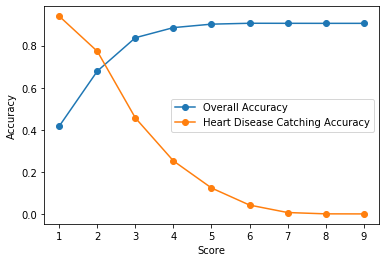

In [43]:
sc = [1, 2, 3, 4, 5, 6, 7, 8, 9]
res1 = [0.4174747713654998, 0.6789104383475244, 0.8374921160517187, 0.8855211289813939, 0.9019709870703249, \
       0.9062164932198045, 0.905964206874803, 0.9058104698833176, 0.9058144118574583]
res2 = [0.939563889005148, 0.7727786380948395, 0.4560750010463316, 0.25191478675762774, 0.12334156447495082, \
       0.042062528774117945, 0.006612815468965806, 0.0003348260996944712, 0.0]
plt.plot(sc, res1, marker = 'o', label = 'Overall Accuracy')
plt.plot(sc, res2, marker = 'o', label = 'Heart Disease Catching Accuracy')
plt.xlabel('Score')
plt.ylabel('Accuracy')
plt.legend()
plt.show()